### **Splitting into Test/Train + Further Cleaning**

In [ ]:
# Import cleaned DF
import pandas as pd
df = pd.read_csv('514NFLDataCleaned.csv')
df.head()

,Week,Date,TeamResult,TeamW,TeamL,Home,OppW,OppL,CumPointsFor,CumPointsAgainst,...,Opp_New Orleans Saints,Opp_New York Giants,Opp_New York Jets,Opp_Philadelphia Eagles,Opp_Pittsburgh Steelers,Opp_San Francisco 49ers,Opp_Seattle Seahawks,Opp_Tampa Bay Buccaneers,Opp_Tennessee Titans,Opp_Washington Commanders
0,2,15-Sep,0,1,0,0,1,0,32,19,...,False,False,False,False,False,False,False,False,False,False
1,3,22-Sep,0,1,1,0,0,2,49,42,...,False,False,False,False,False,False,False,False,False,False
2,4,29-Sep,1,1,2,1,1,2,73,69,...,False,False,False,False,False,False,False,False,False,False
3,5,6-Oct,0,2,2,1,1,3,103,82,...,False,False,False,False,False,False,False,False,False,False
4,6,10-Oct,1,2,3,0,3,2,126,106,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Removing Date
df = df.drop(columns = ["Date"], axis=1)

In [ ]:
# Turn Home into boolean type
df['Home'] = df['Home'].astype(bool)

In [ ]:
# Split data into test and train by using weeks 11, 12, and 13 as test data
X = df.drop(columns = ["TeamResult"], axis=1)

X_train = X[X['Week'] < 11]
X_test = X[X['Week'] >= 11]


y_train = df[df['Week'] < 11]['TeamResult']

y_test = df[df['Week'] >= 11]['TeamResult']

In [ ]:
# Dropping Week from X's
X_train = X_train.drop(columns = ["Week"], axis=1)
X_test = X_test.drop(columns = ["Week"], axis=1)

In [ ]:
# Our split results in a roughly 75/25 train/test split
print(len(X_test) / len(df))
print(len(X_train) / len(df))

0.24022346368715083
0.7597765363128491


In [ ]:
print(len(X_train))
print(len(y_train))

272
272


###**Standardizing non-boolean Columns**

In [ ]:
# Standardizing the data excluding the dummy cols
from sklearn.preprocessing import StandardScaler

bool_cols = X_train.select_dtypes(include='bool').columns

# Creating array for numerical columns
numerical_cols = [col for col in X_train.columns if col not in bool_cols]
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]

# Normalizing numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Convert back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# Rejoin boolean columns
X_train_normalized = pd.concat([X_train_scaled, X_train[bool_cols]], axis=1)
X_test_normalized = pd.concat([X_test_scaled, X_test[bool_cols]], axis=1)

X_train_normalized.head()

,TeamW,TeamL,OppW,OppL,CumPointsFor,CumPointsAgainst,Pdiff,Cum1stD,CumTotYd,CumPassY,...,Opp_New Orleans Saints,Opp_New York Giants,Opp_New York Jets,Opp_Philadelphia Eagles,Opp_Pittsburgh Steelers,Opp_San Francisco 49ers,Opp_Seattle Seahawks,Opp_Tampa Bay Buccaneers,Opp_Tennessee Titans,Opp_Washington Commanders
0,-0.809016,-1.349248,-0.809016,-1.349248,-1.478529,-1.694459,0.309337,-1.699930,-1.698771,-1.713590,...,False,False,False,False,False,False,False,False,False,False
1,-0.809016,-0.778493,-1.388101,-0.207738,-1.214155,-1.335119,0.170645,-1.227168,-1.249701,-1.198502,...,False,False,False,False,False,False,False,False,False,False
2,-0.809016,-0.207738,-0.809016,-0.207738,-0.840921,-0.913285,0.101299,-0.734708,-0.767745,-0.693927,...,False,False,False,False,False,False,False,False,False,False
3,-0.229931,-0.207738,-0.809016,0.363017,-0.374378,-0.710179,0.494259,-0.360438,-0.278984,-0.198111,...,False,False,False,False,False,False,False,False,False,False
4,-0.229931,0.363017,0.349154,-0.207738,-0.016695,-0.335216,0.471144,0.072928,0.156477,0.206601,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# reassign X_test and X_train
X_train = X_train_normalized
X_test = X_test_normalized

**Note:** All the code above should be copied and ran before any modeling is attempted.

**IMPORTANT**: Add a `random_state = 514` argument to any model so we can replicate results.

## **Modeling**

**Logistic Regression**

In [ ]:
# Fitting an LR using grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}

lr = LogisticRegression(random_state=514)
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# best model
best_lr_model = grid_search.best_estimator_

print("Best LR parameters: ", grid_search.best_params_)
y_pred_lr = grid_search.predict(X_test)
y_probs_lr = grid_search.predict_proba(X_test)

Best LR parameters:  {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("LR Classification Report")
print()
print(classification_report(y_test, y_pred_lr))

LR Classification Report

              precision    recall  f1-score   support

           0       0.74      0.58      0.65        43
           1       0.65      0.79      0.72        43

    accuracy                           0.69        86
   macro avg       0.69      0.69      0.68        86
weighted avg       0.69      0.69      0.68        86



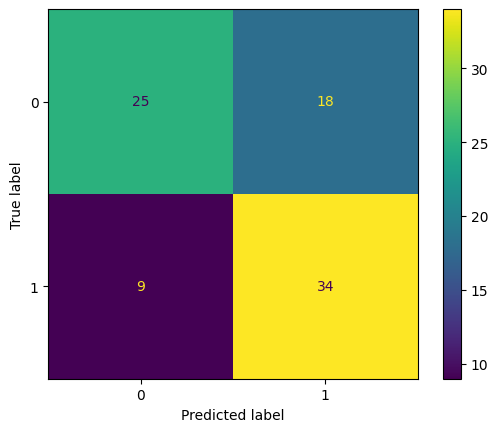

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr)).plot();
# Record: 59-27

**SVM**

In [ ]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

svm = SVC(random_state=514, probability=True)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# best model
best_svm_model = grid_search_svm.best_estimator_

print("Best SVM parameters: ", grid_search_svm.best_params_)
y_pred_svm = grid_search_svm.predict(X_test)
y_probs_svm = grid_search_svm.predict_proba(X_test)

Best SVM parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
print("SVM Classification Report")
print()
print(classification_report(y_test, y_pred_svm))

SVM Classification Report

              precision    recall  f1-score   support

           0       0.62      0.70      0.66        43
           1       0.66      0.58      0.62        43

    accuracy                           0.64        86
   macro avg       0.64      0.64      0.64        86
weighted avg       0.64      0.64      0.64        86



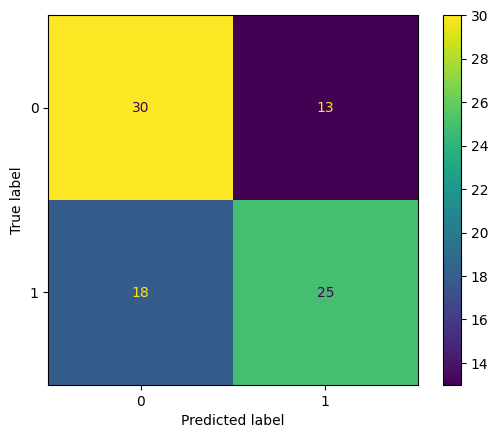

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm)).plot();

**XGB**

In [ ]:
#XGBoost Model
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


# Create an XGBoost classifier
xgb_model = XGBClassifier()

'''
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [15, 20, 25, 30],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train_encoded)

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_
'''

best_xgb_model = XGBClassifier(n_estimators=25, max_depth=3, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state = 514)
best_xgb_model.fit(X_train, y_train_encoded)

# Print the best parameters
#print("Best Parameters:", best_xgb_model.best_params_)
y_pred_xgb = best_xgb_model.predict(X_test)
y_probs_xbg = best_xgb_model.predict_proba(X_test)

#Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 25, 'subsample': 1.0}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("XGB Classification Report")
print()
print(classification_report(y_test, y_pred_xgb))

XGB Classification Report

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        43
           1       0.67      0.60      0.63        43

    accuracy                           0.65        86
   macro avg       0.65      0.65      0.65        86
weighted avg       0.65      0.65      0.65        86



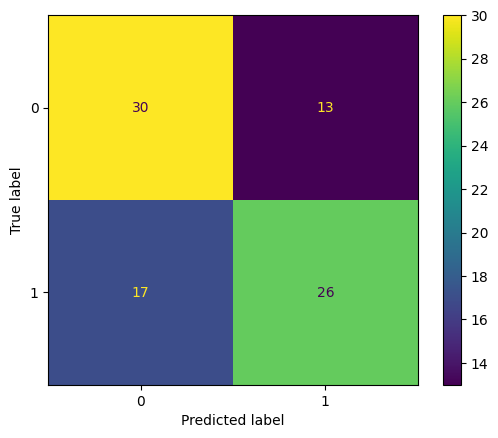

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot();

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
'''
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 6, 8, 10],
    'max_leaf_nodes'  : [6, 12, 18, 24, 30],
    'n_estimators': [15 ,30, 80, 100]
}

grid_search1 = GridSearchCV(rf, param_grid = param_grid, n_jobs=-1)
grid_search1.fit(X_train, y_train)
best_rf__model = grid_search1.best_estimator_
'''

best_rf__model = RandomForestClassifier(criterion='gini', max_depth=10, max_leaf_nodes=18, n_estimators=30, random_state=514)
best_rf__model.fit(X_train, y_train)
#print("Best Parameters:", best_rf__model.best_params_)
y_pred_rf = best_rf__model.predict(X_test)
y_probs_rf = best_rf__model.predict_proba(X_test)


# Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 18, 'n_estimators': 30}

In [ ]:
print("RF Classification Report")
print()
print(classification_report(y_test, y_pred_rf))

RF Classification Report

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        43
           1       0.78      0.58      0.67        43

    accuracy                           0.71        86
   macro avg       0.72      0.71      0.70        86
weighted avg       0.72      0.71      0.70        86



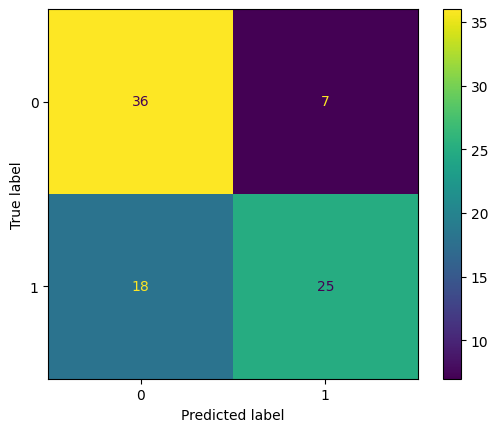

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot();

**Assembling an Emsemble of Best Models (Potentially) or Chosing Best Overall Model**

In [ ]:
print("LR Classification Report")
print()
print(classification_report(y_test, y_pred_lr))
print("SVM Classification Report")
print()
print(classification_report(y_test, y_pred_svm))
print("XGB Classification Report")
print()
print(classification_report(y_test, y_pred_xgb))
print("RF Classification Report")
print()
print(classification_report(y_test, y_pred_rf))

LR Classification Report

              precision    recall  f1-score   support

           0       0.74      0.58      0.65        43
           1       0.65      0.79      0.72        43

    accuracy                           0.69        86
   macro avg       0.69      0.69      0.68        86
weighted avg       0.69      0.69      0.68        86

SVM Classification Report

              precision    recall  f1-score   support

           0       0.62      0.70      0.66        43
           1       0.66      0.58      0.62        43

    accuracy                           0.64        86
   macro avg       0.64      0.64      0.64        86
weighted avg       0.64      0.64      0.64        86

XGB Classification Report

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        43
           1       0.67      0.60      0.63        43

    accuracy                           0.65        86
   macro avg       0.65      0.65      0.65     

Ensemble Classification Report

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        43
           1       0.75      0.70      0.72        43

    accuracy                           0.73        86
   macro avg       0.73      0.73      0.73        86
weighted avg       0.73      0.73      0.73        86



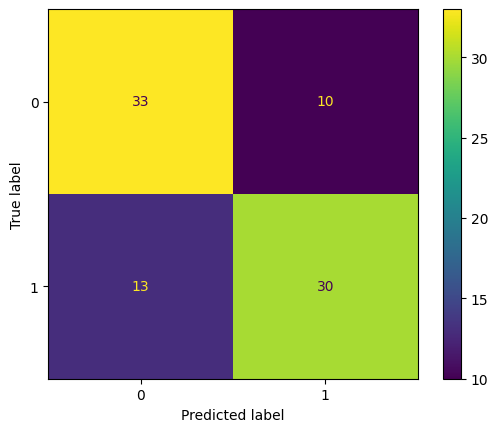

In [ ]:
# Creating an ensemble of our best models
from sklearn.ensemble import VotingClassifier


ensemble = VotingClassifier(estimators=[
    ('lr', grid_search.best_estimator_),
    ('svm', grid_search_svm.best_estimator_),
    ('xgb', best_xgb_model),
    ('rf', best_rf__model)
], voting='soft')

ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)
y_probs_ensemble = ensemble.predict_proba(X_test)

print("Ensemble Classification Report")
print()
print(classification_report(y_test, y_pred_ensemble))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ensemble)).plot();

##**Converting Predictions into Probabilities, Spreads, and Moneylines**

In [ ]:
# calculated win probabilities for test data
team_win_probs = y_probs_ensemble[:,1]

opp_win_probs = y_probs_ensemble[:,0]

In [ ]:
def american_odds(probability):
    """
    Converts implied probability to American odds.

    Args:
    probability (float): The implied probability as a decimal (e.g., 0.75 for 75%).

    Returns:
    str: The American odds as a string with + or -.
    """

    if probability > 0.5:
        # Favorite
        american_odds = -int((probability / (1 - probability)) * 100)
    else:
        # Underdog
        american_odds = int(((1 - probability) / probability) * 100)

    # Format with + or -
    #american_odds = round(american_odds / 5) * 5
    return f"{american_odds:+}"

In [ ]:
# looping through team and opp win probs and converting to american odds
team_american_odds  = []
opp_american_odds = []
for prob in team_win_probs:
  team_american_odds.append(american_odds(prob))

for prob in opp_win_probs:
  opp_american_odds.append(american_odds(prob))

In [ ]:
def point_spread(probability, scaling_factor=25):
    """
    Converts implied probability to a point spread.

    Note: Scaling factor is typically between 15-25 for NFL games. We can tweak this if we want.

    Args:
    probability (float): Implied probability as a decimal (e.g., 0.75 for 75%).
    scaling_factor (int): Factor to scale probability differences to spreads.

    Returns:
    float: Estimated point spread.
    """
    point_spread = (0.5 - probability) * scaling_factor
    return round(point_spread * 2) / 2

In [ ]:
team_spreads = []
opp_spreads = []
for prob in team_win_probs:
  team_spreads.append(point_spread(prob))

for prob in opp_win_probs:
  opp_spreads.append(point_spread(prob))

In [ ]:
print("Team Probs, Lines, and Spread")
print()
print(team_win_probs[:5])
print(team_american_odds[:5])
print(team_spreads[:5])
print()
print("Opp Probs, Lines, and Spread")
print()
print(opp_win_probs[:5])
print(opp_american_odds[:10])
print(opp_spreads[:10])

Team Probs, Lines, and Spread

[0.78228305 0.640532   0.44076701 0.430486   0.4167759 ]
['-359', '-178', '+126', '+132', '+139']
[-7.0, -3.5, 1.5, 1.5, 2.0]

Opp Probs, Lines, and Spread

[0.21771695 0.359468   0.559233   0.569514   0.5832241 ]
['+359', '+178', '-126', '-132', '-139', '-131', '-113', '-169', '+193', '+648']
[7.0, 3.5, -1.5, -1.5, -2.0, -1.5, -1.0, -3.0, 4.0, 9.0]


In [ ]:
def calculate_odds_with_hold(team_probs, opp_probs, hold=0.025):

    results = []
    for prob_team, prob_opp in zip(team_probs, opp_probs):

        # Calculate the proportional adjustment
        total_prob = prob_team + prob_opp
        adjusted_prob_team = (prob_team / total_prob) * (1 + hold)
        adjusted_prob_opp = (prob_opp / total_prob) * (1 + hold)

        # Convert adjusted probabilities to American odds
        team_odds = american_odds(adjusted_prob_team)
        opp_odds = american_odds(adjusted_prob_opp)

        # Store results
        results.append((team_odds, opp_odds))

    return results

In [ ]:
# Odds for each game
game_moneylines = calculate_odds_with_hold(team_win_probs, opp_win_probs)
game_moneylines[:5]

[('-404', '+348'),
 ('-191', '+171'),
 ('+121', '-134'),
 ('+126', '-140'),
 ('+134', '-148')]

In [ ]:
team_spreads[:5]

[-7.0, -3.5, 1.5, 1.5, 2.0]

In [ ]:
# Adding game_moneylines, team_spreads, and opp_spreads to the test data
X_test['team_win_prob'] = team_win_probs
X_test['opp_win_prob'] = opp_win_probs
X_test['game_moneylines'] = game_moneylines
X_test['team_moneyline'] = X_test['game_moneylines'].apply(lambda x: x[0])
X_test['opp_moneyline'] = X_test['game_moneylines'].apply(lambda x: x[1])
X_test['team_spread'] = team_spreads
X_test['opp_spread'] = opp_spreads
X_test.head()

,TeamW,TeamL,OppW,OppL,CumPointsFor,CumPointsAgainst,Pdiff,Cum1stD,CumTotYd,CumPassY,...,Opp_Tampa Bay Buccaneers,Opp_Tennessee Titans,Opp_Washington Commanders,team_win_prob,opp_win_prob,game_moneylines,team_moneyline,opp_moneyline,team_spread,opp_spread
8,1.507325,0.933772,0.928240,1.504527,1.647308,1.164639,0.725412,1.707896,2.055953,2.042695,...,False,False,False,0.782283,0.217717,"(-404, +348)",-404,+348,-7.0,7.0
9,1.507325,1.504527,2.665495,0.363017,1.911682,1.477109,0.656066,2.121563,2.370075,2.298487,...,False,False,False,0.640532,0.359468,"(-191, +171)",-191,+171,-3.5,3.5
10,1.507325,2.075282,3.823666,-0.207738,2.067196,2.070802,0.008838,2.338246,2.643373,2.643631,...,False,False,False,0.440767,0.559233,"(+121, -134)",+121,-134,1.5,-1.5
19,0.928240,1.504527,2.086410,0.363017,1.040802,0.930287,0.170645,1.432118,1.123792,0.944192,...,False,False,False,0.430486,0.569514,"(+126, -140)",+126,-140,1.5,-1.5
20,0.928240,2.075282,3.244581,-0.207738,1.460691,1.398992,0.101299,1.826087,1.575130,1.504832,...,False,False,False,0.416776,0.583224,"(+134, -148)",+134,-148,2.0,-2.0


### **Final Formatting**

**Final DF for presentation should include each matchup (home and away), each teams record, our prediction (W/L) with its associated probability, and each teams Moneyline and the spread**

then we can make cool graphics on the presentation with specific games of interest.

In [ ]:
original_data = pd.read_csv('514NFLDataPredummy.csv')

In [ ]:
def create_matchup_column(row):
    if row['Home'] == 1:
        return f"{row['Opp']} @ {row['Team']}"
    else:
        return f"{row['Team']} @ {row['Opp']}"

original_data['Game'] = original_data.apply(create_matchup_column, axis=1)

In [ ]:
original_data.head()

,Week,Date,TeamResult,TeamW,TeamL,Home,OppW,OppL,Team,Opp,...,3weekOppTotYd,3weekOppPassY,3weekOppRushY,3weekOppTO,3weekxpOffense,3weekxpDefense,3weekxpSpTms,mean_sentiment_team,mean_sentiment_opp,Game
0,2,15-Sep,0,1,0,0,1,0,San Francisco 49ers,Minnesota Vikings,...,266.00,198.00,68.00,2.0,11.24,2.83,0.93,-0.267482,0.198914,San Francisco 49ers @ Minnesota Vikings
1,3,22-Sep,0,1,1,0,0,2,San Francisco 49ers,Los Angeles Rams,...,334.50,227.50,107.00,2.0,6.05,-0.47,-1.73,0.031200,0.141325,San Francisco 49ers @ Los Angeles Rams
2,4,29-Sep,1,1,2,1,1,2,San Francisco 49ers,New England Patriots,...,321.67,217.67,104.00,2.0,10.40,-5.35,-2.20,0.224317,0.304638,New England Patriots @ San Francisco 49ers
3,5,6-Oct,0,2,2,1,1,3,San Francisco 49ers,Arizona Cardinals,...,305.00,199.33,105.67,2.5,10.48,1.76,-7.94,-0.008782,0.128422,Arizona Cardinals @ San Francisco 49ers
4,6,10-Oct,1,2,3,0,3,2,San Francisco 49ers,Seattle Seahawks,...,290.00,176.67,113.33,2.0,10.07,1.30,-4.84,0.344758,0.510327,San Francisco 49ers @ Seattle Seahawks


In [ ]:
# Filtering original data to X_test indicies
original_data_test = original_data.loc[X_test.index]
original_data_test.head()

,Week,Date,TeamResult,TeamW,TeamL,Home,OppW,OppL,Team,Opp,...,3weekOppTotYd,3weekOppPassY,3weekOppRushY,3weekOppTO,3weekxpOffense,3weekxpDefense,3weekxpSpTms,mean_sentiment_team,mean_sentiment_opp,Game
8,11,17-Nov,0,5,4,1,4,5,San Francisco 49ers,Seattle Seahawks,...,278.67,162.00,116.67,2.00,9.11,-3.11,-5.38,0.111639,0.193440,Seattle Seahawks @ San Francisco 49ers
9,12,24-Nov,0,5,5,0,7,3,San Francisco 49ers,Green Bay Packers,...,265.33,178.67,86.67,1.50,11.94,-2.36,-5.04,-0.044793,0.180213,San Francisco 49ers @ Green Bay Packers
10,13,1-Dec,0,5,6,0,9,2,San Francisco 49ers,Buffalo Bills,...,276.33,152.00,124.33,1.00,1.19,-5.48,-5.06,-0.134788,0.168967,San Francisco 49ers @ Buffalo Bills
19,11,17-Nov,0,4,5,1,6,3,Chicago Bears,Green Bay Packers,...,386.33,211.33,175.00,1.50,-12.00,-2.54,0.97,0.052120,0.173863,Green Bay Packers @ Chicago Bears
20,12,24-Nov,0,4,6,1,8,2,Chicago Bears,Minnesota Vikings,...,348.00,193.67,154.33,1.33,-5.48,-4.94,-1.26,0.002303,0.448008,Minnesota Vikings @ Chicago Bears


In [ ]:
print(X_test.shape)
print(original_data_test.shape)

(86, 104)
(86, 41)


In [ ]:
# Adding Week, Game, Team, and Opp column to X_test
X_test['Week'] = original_data_test['Week']
X_test['Game'] = original_data_test['Game']
X_test['Home'] = original_data_test['Home']
X_test['Team'] = original_data_test['Team']
X_test['Opp'] = original_data_test['Opp']

In [ ]:
# Create a nice formatted DF with all the matchups, similar to how a DK/FD card for a game would look minus O/U
# Question: Do we want to give a slight bonus in points to home teams?
  # We have home as a column the model is trained on, but I'm not sure that did much to actually skew our lines in favor of home teams

In [ ]:
final_df = X_test[['Week', 'Game', 'Home', 'Team', 'Opp', 'team_win_prob', 'opp_win_prob', 'team_moneyline', 'opp_moneyline', 'team_spread', 'opp_spread']]
final_df

,Week,Game,Home,Team,Opp,team_win_prob,opp_win_prob,team_moneyline,opp_moneyline,team_spread,opp_spread
8,11,Seattle Seahawks @ San Francisco 49ers,1,San Francisco 49ers,Seattle Seahawks,0.782283,0.217717,-404,+348,-7.0,7.0
9,12,San Francisco 49ers @ Green Bay Packers,0,San Francisco 49ers,Green Bay Packers,0.640532,0.359468,-191,+171,-3.5,3.5
10,13,San Francisco 49ers @ Buffalo Bills,0,San Francisco 49ers,Buffalo Bills,0.440767,0.559233,+121,-134,1.5,-1.5
19,11,Green Bay Packers @ Chicago Bears,1,Chicago Bears,Green Bay Packers,0.430486,0.569514,+126,-140,1.5,-1.5
20,12,Minnesota Vikings @ Chicago Bears,1,Chicago Bears,Minnesota Vikings,0.416776,0.583224,+134,-148,2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
345,12,Pittsburgh Steelers @ Cleveland Browns,1,Cleveland Browns,Pittsburgh Steelers,0.215320,0.784680,+353,-410,7.0,-7.0
346,13,Cleveland Browns @ Denver Broncos,0,Cleveland Browns,Denver Broncos,0.201937,0.798063,+383,-449,7.5,-7.5
355,11,Jacksonville Jaguars @ Detroit Lions,1,Detroit Lions,Jacksonville Jaguars,0.828810,0.171190,-564,+469,-8.0,8.0
356,12,Detroit Lions @ Indianapolis Colts,0,Detroit Lions,Indianapolis Colts,0.828164,0.171836,-561,+467,-8.0,8.0


In [ ]:
week11 = final_df[final_df['Week'] == 11]
print(week11.shape)
week12 = final_df[final_df['Week'] == 12]
print(week12.shape)
week13 = final_df[final_df['Week'] == 13]
print(week13.shape)

(28, 11)
(26, 11)
(32, 11)


In [ ]:
week11.to_csv('week11lines.csv', index=False)
week12.to_csv('week12lines.csv', index=False)
week13.to_csv('week13lines.csv', index=False)